In [13]:
import math, copy
cp = copy.deepcopy
import numpy as np
%load_ext autoreload
%autoreload 2
import matrix_utils as mu
import itertools as it
import networkx as nx


#import matplotlib
#matplotlib.use("TKAgg")
import matplotlib.pyplot as plt

mp = np.linalg.matrix_power
options = {
    "font_size": 9,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True,
    }
def zero_matrix(n):
    return np.array([[0] * n for _ in range(n)])
def draw_it(A, figsize=(10,8), digraph=True, bipart=False, pos=None):
    assert mu.square(A)
    n = mu.n_(A)
    G = nx.from_numpy_array(A, create_using=nx.DiGraph if digraph else nx.Graph)   

    if pos is None:
        pos = nx.spring_layout(G, k=0.3) if not bipart else nx.bipartite_layout(G)

    #nx.draw_networkx(G, pos, **options)
    fig, ax = plt.subplots(figsize=figsize, dpi=150)
    nx.draw(G, pos, ax=ax, **options)
    plt.show()

def draw(G):
    pos = nx.spring_layout(G, k=0.3)
    fig, ax = plt.subplots(figsize=figsize, dpi=150)
    nx.draw(G, pos, ax=ax, **options)
    plt.show()
# Set margins for the axes so that nodes aren't clipped
    #ax = plt.gca() 
    #ax.margins(0.20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:

mp = np.linalg.matrix_power
A_1 = np.array([
                [0,0,1,1],
                [1,0,1,0],
                [0,1,0,1],
                [1,1,0,0]
                ])
A_2 = np.array([
                [1,0,1,0],
                [1,0,1,0],
                [0,1,0,1],
                [0,1,0,1]
                ])
A_3 = np.array([
                [1,0,1,0],
                [1,1,0,0],
                [0,0,1,1],
                [0,1,0,1]
                ])
As = [A_1, A_2, A_3]



print("E4.1")
for A in As:
    print(f"is primitive: {mu.primitive(A)}")
#    draw_it(A)


E4.1
is primitive: True
is primitive: True
is primitive: True


E4.2 and E4.3
What are the eigenvalues and eigenvectors of the A?
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]


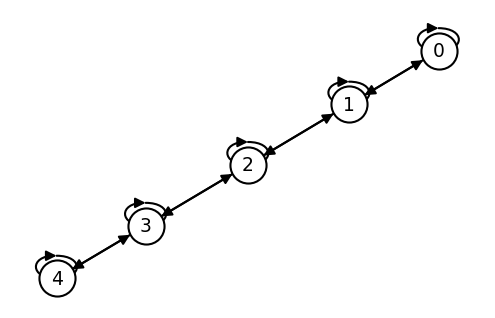

Spectral graph theory tells us that, for a non-negative x in R^n:
 r1*x <= Ax <= r2*x -> r1 <= rho(A) <= r2
Given the degrees of the graph and since A is irreducible -- given that it is strongly connected:
The bounds are STRICT: r1 < rho(A) < r2 (Why?)

d_out(i) = ei^T * A * 1n
Theorem 4.11 states that rho(A) is in the range of the row sums: A * 1n <--> min(A1n) <= rho(A) <= max(A1n)
-0.732 < rho(A) < 2.732
And since r1 < r2 (STRICTLY), rho(A) < max(A1n) = 3

The eigenvalues have a strange pattern that I do not understand


In [2]:
print("E4.2 and E4.3")
print("What are the eigenvalues and eigenvectors of the A?")
figsize=(4,2.5)
n = 5
A = mu.get_path_graph(n)
print(A)
draw_it(A, figsize=figsize)
print("Spectral graph theory tells us that, for a non-negative x in R^n:\n r1*x <= Ax <= r2*x -> r1 <= rho(A) <= r2")
print("Given the degrees of the graph and since A is irreducible -- given that it is strongly connected:")
print("The bounds are STRICT: r1 < rho(A) < r2 (Why?)\n")

print("d_out(i) = ei^T * A * 1n")
print("Theorem 4.11 states that rho(A) is in the range of the row sums: A * 1n <--> min(A1n) <= rho(A) <= max(A1n)")
e = sorted(linalg.eigvals(A))
print(f"{e[0]:.3f} < rho(A) < {e[-1]:.3f}")
print("And since r1 < r2 (STRICTLY), rho(A) < max(A1n) = 3")

print("\nThe eigenvalues have a strange pattern that I do not understand") 

E4.4 Adjacency spectrum of basic graphs
path graph: eigenvalues should follow nice periodic pattern, but I can't get numpy to get me the correct ones?


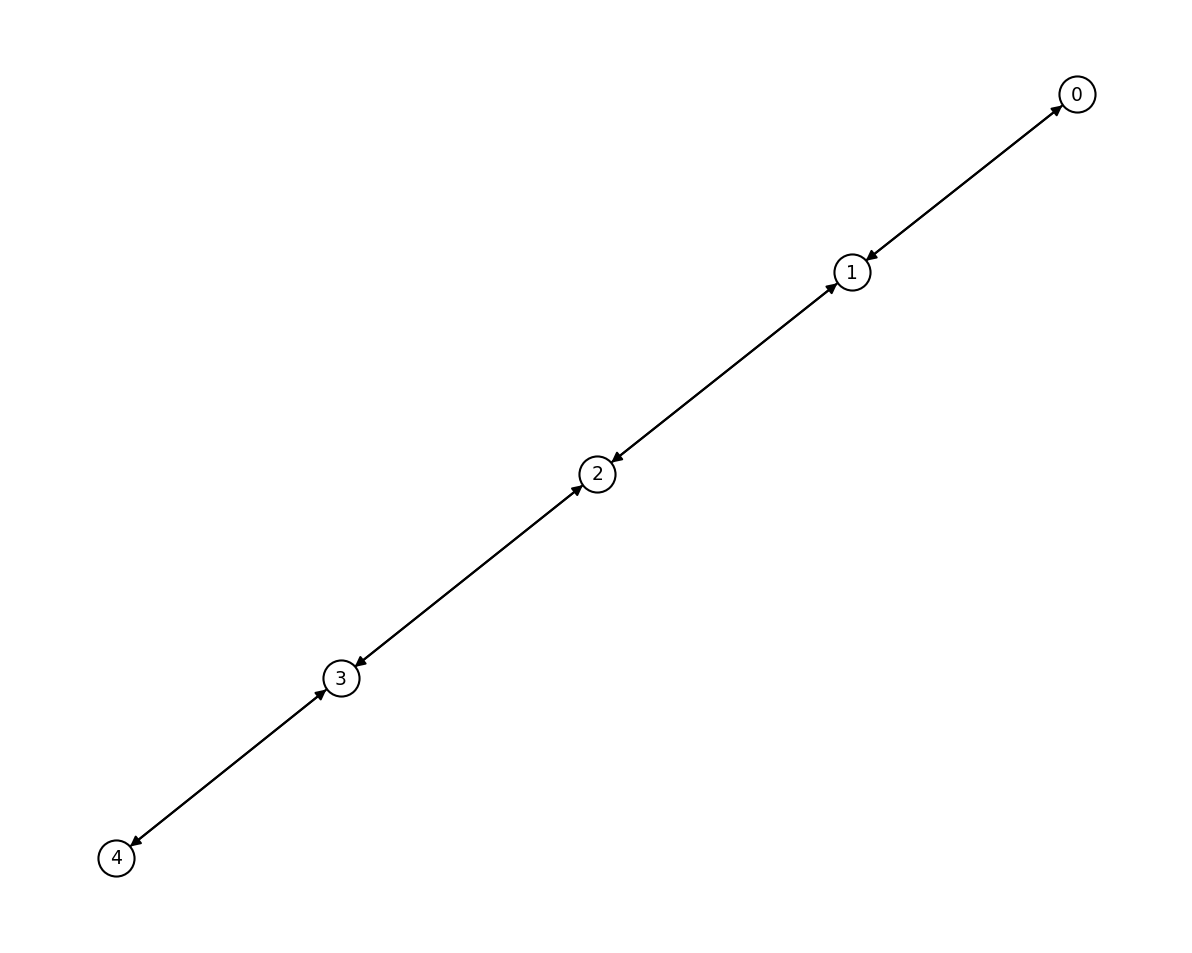

Equal: (False, [(np.float64(-1.7320508075688763), -0.9999999999999996), (np.float64(-0.9999999999999992), 1.2246467991473532e-16), (np.float64(-3.2982420948648636e-17), 1.0000000000000002), (np.float64(1.0), 1.7320508075688774), (np.float64(1.7320508075688805), 2.0)])


In [3]:
print("E4.4 Adjacency spectrum of basic graphs")
print("path graph: eigenvalues should follow nice periodic pattern, but I can't get numpy to get me the correct ones?")
cos = math.cos; PI=math.pi
n = 5

def compare(eigs, theo):
    for e in it.permutations(eigs):
        zipped = list(zip(e, theo))
        T = np.array([math.isclose(z[0],z[1]) for z in zipped])
        if T.all():
            return True
    return False, list(zip(sorted(eigs),sorted(theo)))
    
A_1 = mu.get_path_graph(n, False)
draw_it(A_1)
eigs = linalg.eigvals(A_1)
theo = [2*cos( (PI*i)/(n + 1) ) for i in range(n)]
print(f"Equal: {compare(eigs,theo)}")




E4.5 Edges and Triangles in an undirected graph


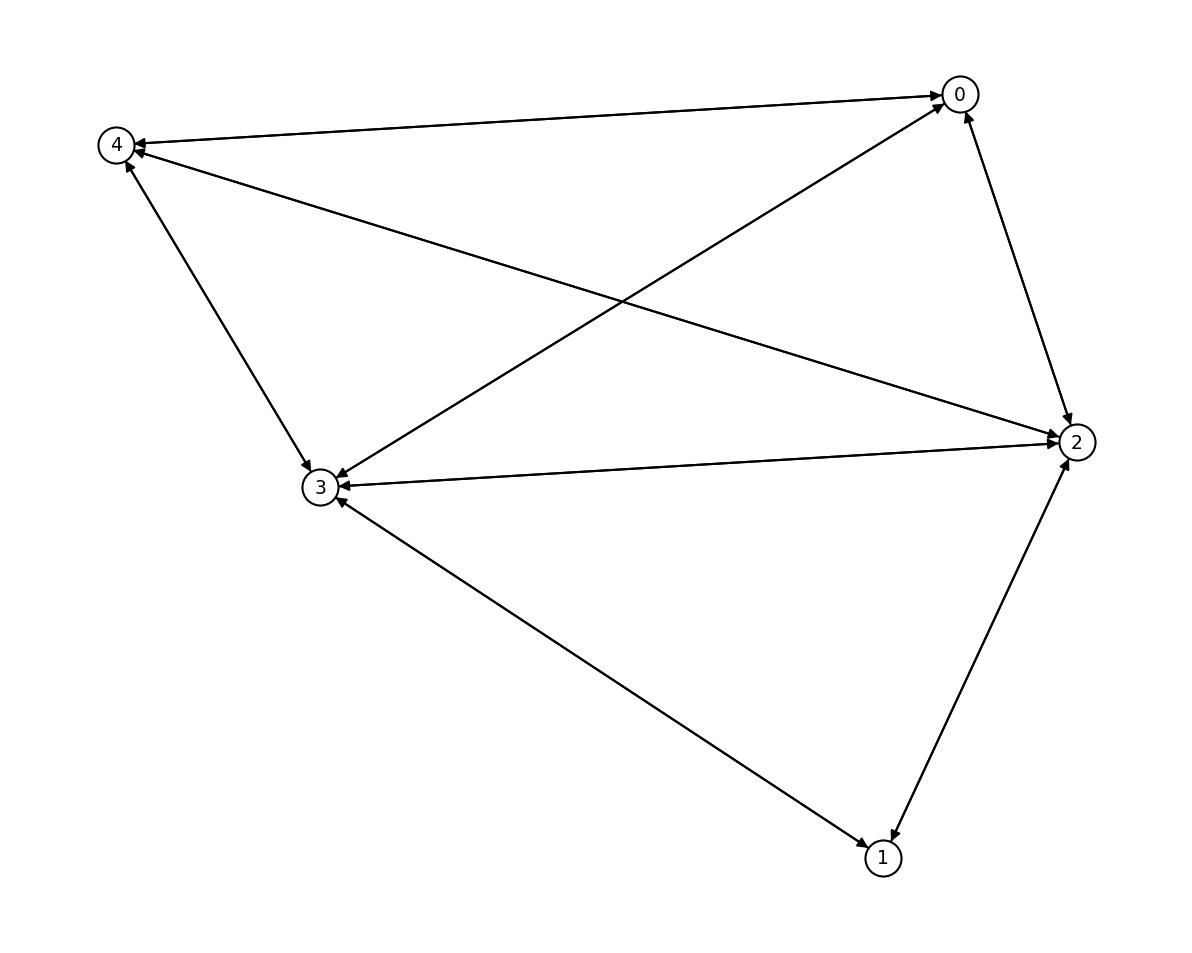

trace(A) is ofc 0, but why is tr(A^2) = 2E and tr(A^3) = 6 * triads?

The diagonal of A^2 is the degrees, not sure why
[3. 2. 4. 4. 3.]
OBS: this is of interest, the diagonal of A^3 is twice the number of triads each node is in. This is the first part of Lemma 4.2: number of directed walks of length k to ITSELF.
[6. 2. 8. 8. 6.]


In [161]:
print("E4.5 Edges and Triangles in an undirected graph")
n = 5
A = mu.get_random_uni(5)
draw_it(A)
print("trace(A) is ofc 0, but why is tr(A^2) = 2E and tr(A^3) = 6 * triads?")

print("\nThe diagonal of A^2 is the degrees, not sure why")
print(np.diag(mp(A,2)))
print("OBS: this is of interest, the diagonal of A^3 is twice \
the number of triads each node is in. This is the first part of Lemma 4.2: number of, directed, \
walks of length k to ITSELF.")
print(np.diag(mp(A,3)))

In [187]:
print("E4.5: Prove lemma 4.2: Directed walks and powers of A")
n


E4.5: Prove lemma 4.2: Directed walks and powers of A


5

E4.7: Block Triangular


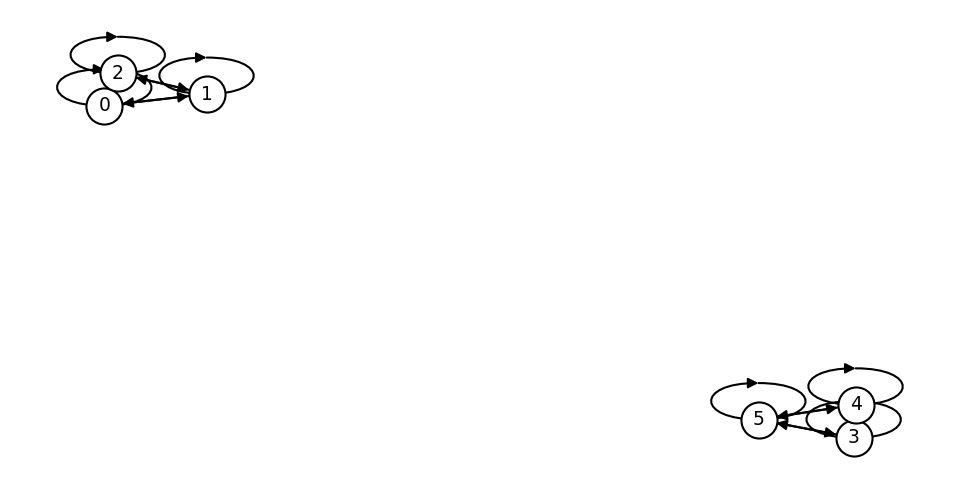

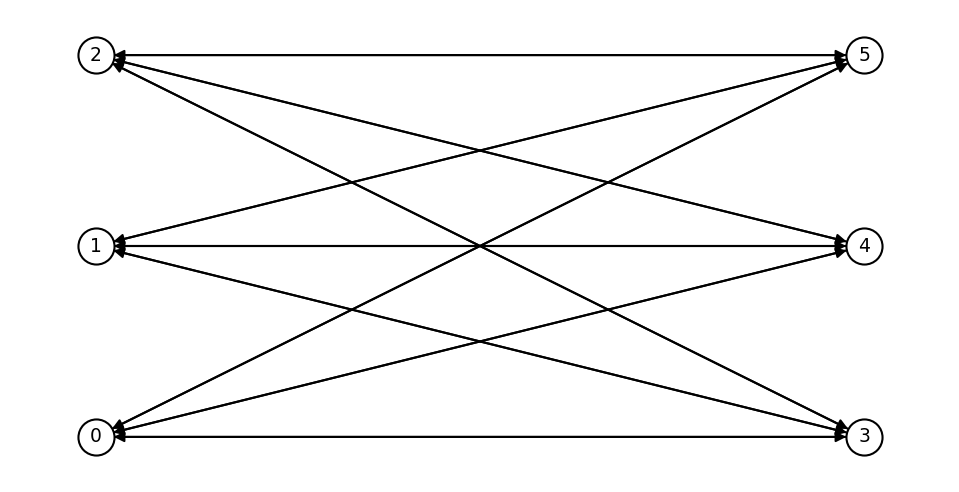

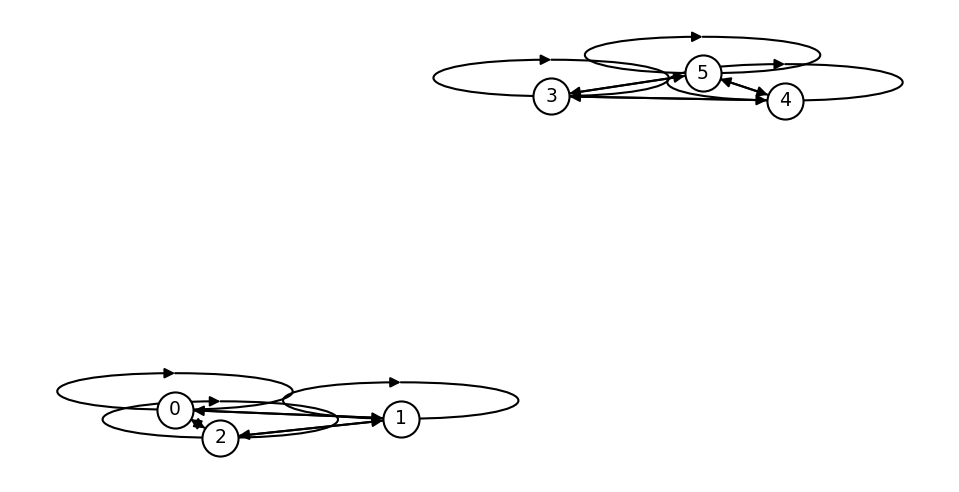

In [224]:
print("E4.7: Block Triangular")
figsize=(8,4)
def check_row_eq(A,B,n):
    I_n = np.eye(n)
    for _P in it.permutations(I_n.tolist()):
        P = np.array(_P)
        if (P @ A).all() == B.all():
            return P
    return zero_matrix(n)
def permute(A, B):
    def check(A, B):
        a_n, a_m = A.shape
        b_n, b_m = B.shape
        assert a_n == a_m == b_n == b_m
        return a_n
    n = check(A,B)  
    return check_row_eq(A,B,n)

def homomorphism(A, k):
    n,_ = A.shape
    I_n = np.eye(n)
    for i, _P in enumerate(it.permutations(I_n.tolist())):
        if i >= k:
            P = np.array(_P)
            return P @ A @ P.T
    
    
    zero_matrix(n) # return zero matrix if not row eqivalent
A = np.array([
                [1,1,1,0,0,0],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0],
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                ])
B = np.array([
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [0,0,0,1,1,1],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0],
                [1,1,1,0,0,0],
                ])

D = mu.get_random(6)
draw_it(A, figsize=figsize)
draw_it(cp(B),figsize=figsize, bipart=True)
C = permute(cp(A),cp(B))
if C.any():
    draw_it(cp(C) @ cp(A), figsize=figsize)

    
#C = homomorphism(D,4)
#draw_it(C)


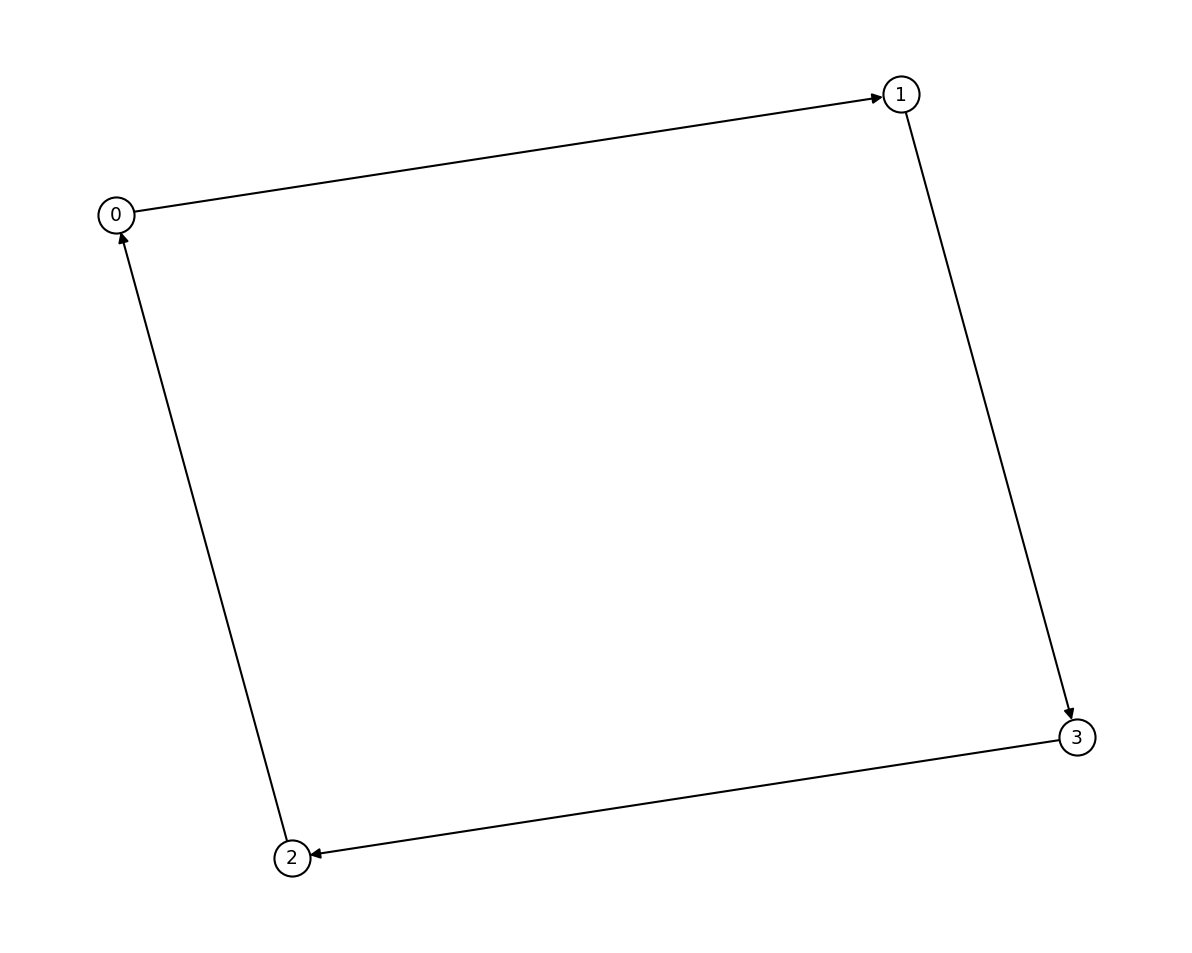

In [229]:
B = np.array([
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],])
C = np.array([
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],])
draw_it(C)

In [4]:
print("E6.1")
print("l_max = max(1,..,n) l_ii, largest diagonal: the node with highest degree")
print("Pick eps < 1/l_max, and define AL = np.eye(n) - eps * L") # Why, what is this suppose to mean?
print("G is a digraph w/o self-loops, show that:")
print("(i)\n AL is row-stocastic: A1 = 1, and np.diag(A).all() > 0")
print("strictly positive: since L's non-diagonals are non-positive, subtracting them gives non-negative, since eps < 1/l_max, all diagonals in eps * L will be less than 1")
print("But why is is row-stocastic? I guess it make sense, since L1 = 0, AL = I_n - eps * L will give AL*1= 1 because of the identity meatric.")

print("(ii)\n G_AL has all the edges in G_L + self-loops: the identity addes the self-loops.")
print("(iii)\n AL is doubly stocatis <-> G_L is wieght-balanced: same weighted in-and-out degree")
print("weight-balanced means that the sum of row_i = sum of col_i, so it make sense")
print("(iv)\n AL is primitiev <-> G_L is strongly connected")
print("Will I ever figure out how primitivity works?")


E6.1
l_max = max(1,..,n) l_ii, largest diagonal: the node with highest degree
Pick eps < 1/l_max, and define AL = np.eye(n) - eps * L
G is a digraph w/o self-loops, show that:
(i)
 AL is row-stocastic: A1 = 1, and np.diag(A).all() > 0
strictly positive: since L's non-diagonals are non-positive, subtracting them gives non-negative, since eps < 1/l_max, all diagonals in eps * L will be less than 1
But why is is row-stocastic? I guess it make sense, since L1 = 0, AL = I_n - eps * L will give AL*1= 1 because of the identity meatric.
(ii)
 G_AL has all the edges in G_L + self-loops: the identity addes the self-loops.
(iii)
 AL is doubly stocatis <-> G_L is wieght-balanced: same weighted in-and-out degree
weight-balanced means that the sum of row_i = sum of col_i, so it make sense
(iv)
 AL is primitiev <-> G_L is strongly connected
Will I ever figure out how primitivity works?


E6.2
G* is a 8 node graph, spec(L(G*)) = {0,0,...,2.86}
(i) G* cannot be G1: G1 is disconnected, so lambda_2 is 0. G* has complex eigenvalues, G1 is symmetric, so all its eigenvalues are real.
[np.float64(0.0), np.float64(3.410897678828753e-16), np.float64(0.3905038073224229), np.float64(1.740214951759323), np.float64(2.553152581841645), np.float64(3.608380730294736), np.float64(4.571054081047716), np.float64(5.13669384773417)]


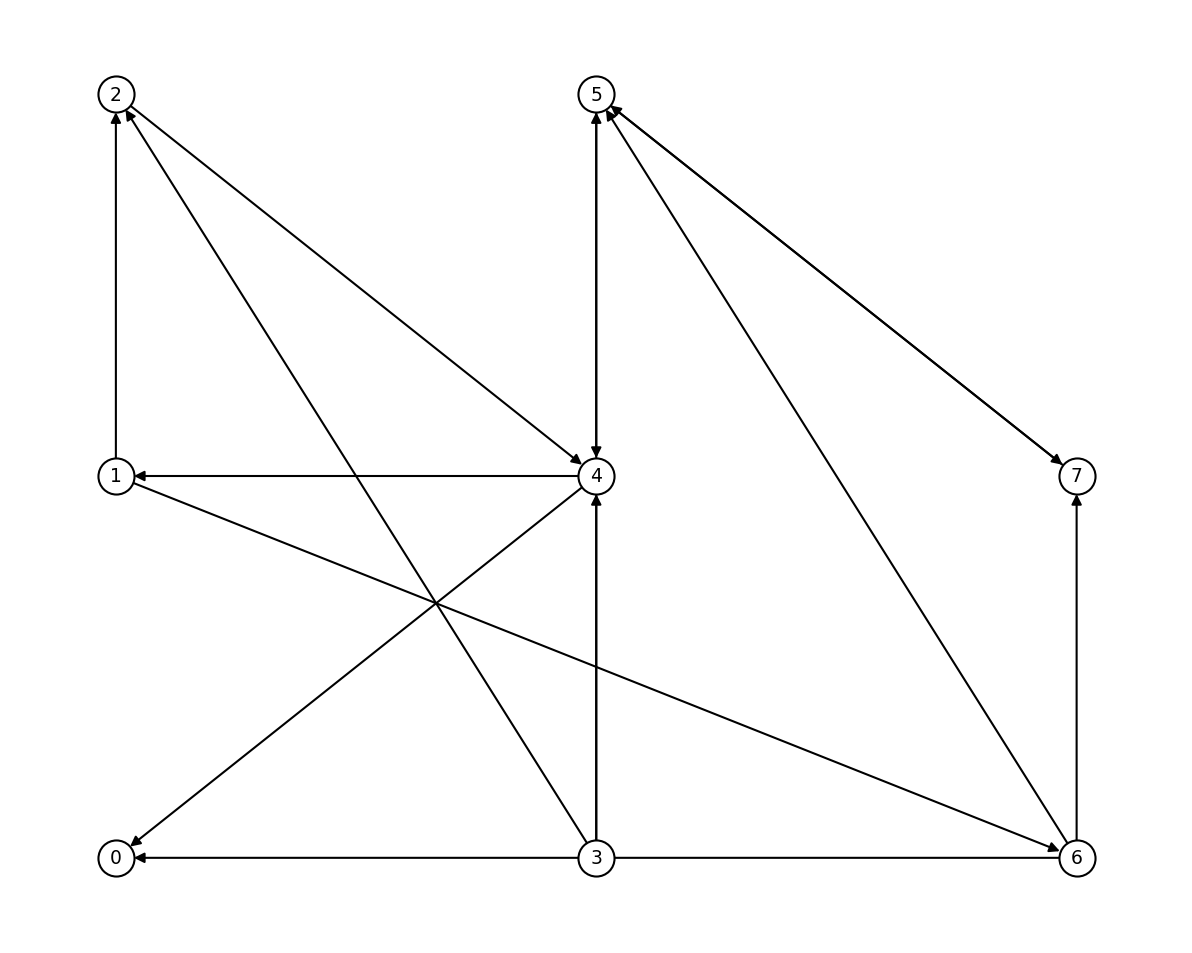

In [14]:
print("E6.2")
print("G* is a 8 node graph, spec(L(G*)) = {0,0,...,2.86}")
print("(i) G* cannot be G1: G1 is disconnected, so lambda_2 is 0. G* has complex eigenvalues, G1 is symmetric, so all its eigenvalues are real.")

A_G1 = np.zeros((8,8))
                
A_G1[0][2] = A_G1[0][3] = A_G1[0][4] = 1
A_G1[1][4] = 1
A_G1[2][0] = A_G1[2][3] = A_G1[2][6] = 1
A_G1[3][0] = A_G1[3][2] = A_G1[3][6] = A_G1[3][7] = 1
A_G1[4][0] = A_G1[4][1] = 1
A_G1[6][2] = A_G1[6][3] = A_G1[6][7] = 1
A_G1[7][3] = A_G1[7][6] = 1
 
D = []
for row in A_G1:
    D.append(sum(row)) 
    
D = np.diag(D)
    
assert A_G1.all() == A_G1.T.all()

print(sorted(np.linalg.eigvals(D-A_G1)))

A_G2 = np.array([
    [0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,1,0],
    [0,0,0,0,1,0,0,0],
    [0,0,1,0,1,1,0,0],
    [1,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,1],
    [1,0,0,0,0,1,0,1],
    [0,0,0,0,0,1,0,0],
], dtype=int)
pos = {}
for ix,ij in enumerate(it.product(range(3), range(3))):
    if ix == 8:
        break
    pos[ix] = ij
draw_it(A_G2, pos=pos)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


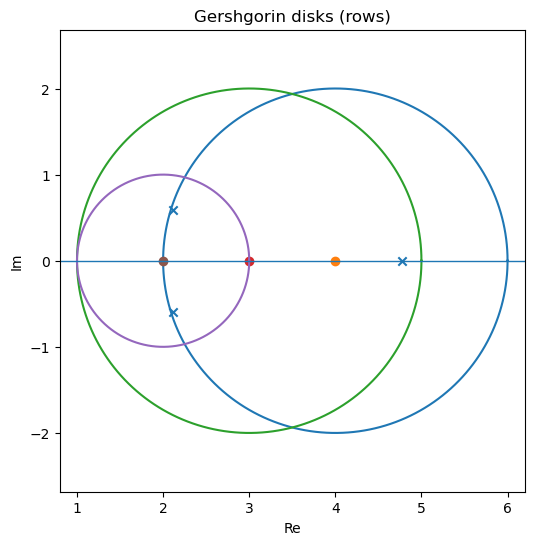

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gershgorin(A, ax=None, show_eigs=True, equal_aspect=True):
    """
    Plot Gershgorin disks for a square matrix A in the complex plane.
    Disks: center = a_ii, radius = sum_{j!=i} |a_ij|  (row-based).
    """
    A = np.asarray(A)
    n, m = A.shape
    if n != m:
        raise ValueError("A must be square")

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    centers = np.diag(A)
    radii = np.sum(np.abs(A), axis=1) - np.abs(centers)

    # Plot disks
    theta = np.linspace(0, 2*np.pi, 400)
    for c, r in zip(centers, radii):
        cx, cy = np.real(c), np.imag(c)
        x = cx + r * np.cos(theta)
        y = cy + r * np.sin(theta)
        ax.plot(x, y)
        ax.plot(cx, cy, marker='o')

    # Optionally plot eigenvalues (for comparison)
    if show_eigs:
        eigs = np.linalg.eigvals(A)
        ax.scatter(np.real(eigs), np.imag(eigs), marker='x')

    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.set_xlabel("Re")
    ax.set_ylabel("Im")
    ax.set_title("Gershgorin disks (rows)")

    if equal_aspect:
        ax.set_aspect('equal', adjustable='datalim')

    # Expand limits a bit for visibility
    max_r = np.max(radii) if n > 0 else 1.0
    re = np.real(centers)
    im = np.imag(centers)
    pad = 0.1 * (max_r + 1e-12)
    ax.set_xlim(np.min(re - radii) - pad, np.max(re + radii) + pad)
    ax.set_ylim(np.min(im - radii) - pad, np.max(im + radii) + pad)

    return ax

# Example
A = np.array([
    [4, 1, -1],
    [2, 3,  0],
    [1, 0,  2]
], dtype=float)

plot_gershgorin(A)
plt.show()
